In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
from scipy import stats
from numpy.random import default_rng
from numpy.random import SeedSequence



In [2]:
data = pd.read_excel("metal_tests.xlsx", na_values = "ND")
data.info()
data.to_csv("data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  1274 non-null   object 
 1   accessioning_type    1275 non-null   object 
 2   sample_id            1275 non-null   object 
 3   arsenic_ug_g         885 non-null    float64
 4   cadmium_ug_g         1072 non-null   float64
 5   lead_ug_g            1097 non-null   float64
 6   mercury_ug_g         961 non-null    float64
dtypes: float64(4), object(3)
memory usage: 69.9+ KB


In [3]:
data.lead_ug_g.value_counts()

0.107667    4
0.028733    3
0.123333    3
0.021567    3
0.121333    3
           ..
0.001767    1
0.147000    1
0.019967    1
1.403333    1
0.036667    1
Name: lead_ug_g, Length: 945, dtype: int64

In [4]:
flower = data.loc[(data.accessioning_type == "Flower") | (data.accessioning_type == "Leaf/Mixed Plant Material"),:].copy()

In [5]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-null    float64
 4   cadmium_ug_g         442 non-null    float64
 5   lead_ug_g            411 non-null    float64
 6   mercury_ug_g         352 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.3+ KB


In [6]:
floc = flower.replace("ND", np.nan)

In [7]:
floc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-null    float64
 4   cadmium_ug_g         442 non-null    float64
 5   lead_ug_g            411 non-null    float64
 6   mercury_ug_g         352 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.3+ KB


In [8]:
rng = default_rng(SeedSequence().entropy)
dist_pb = np.abs(stats.norm.rvs(loc = 0, scale = 0.042/2, size = 10000, random_state = rng))
rng = default_rng(SeedSequence().entropy+10)
dist_hg = np.abs(stats.norm.rvs(loc = 0, scale = 0.016/2, size = 10000, random_state = rng))
rng = default_rng(SeedSequence().entropy+ 20)
dist_cd = np.abs(stats.norm.rvs(loc = 0, scale = 0.016/2, size = 10000, random_state = rng))
rng = default_rng(SeedSequence().entropy +30)
dist_as = np.abs(stats.norm.rvs(loc = 0, scale = 0.042/2, size = 10000, random_state = rng))




In [9]:
flocc = floc.copy()
flocc.lead_ug_g = flocc.lead_ug_g.fillna(pd.Series(dist_pb))
flocc.mercury_ug_g = flocc.mercury_ug_g.fillna(pd.Series(dist_hg))
flocc.cadmium_ug_g = flocc.cadmium_ug_g.fillna(pd.Series(dist_cd))
flocc.arsenic_ug_g = flocc.arsenic_ug_g.fillna(pd.Series(dist_as))
flocc.info()
floc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         453 non-null    float64
 4   cadmium_ug_g         453 non-null    float64
 5   lead_ug_g            453 non-null    float64
 6   mercury_ug_g         453 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-nul

<AxesSubplot:xlabel='lead_ug_g', ylabel='Count'>

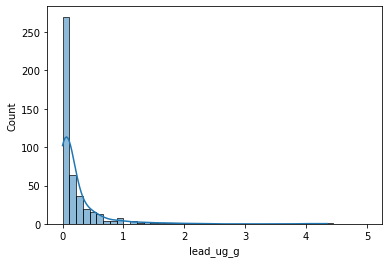

In [10]:
sb.histplot(data=flocc, x = "lead_ug_g", bins= 45, binrange = (0,5), kde=True)

<AxesSubplot:xlabel='mercury_ug_g', ylabel='Count'>

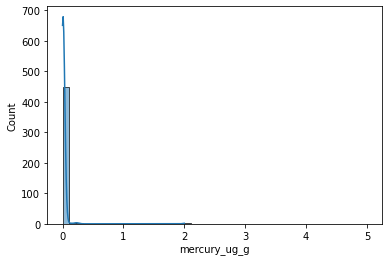

In [11]:
sb.histplot(data=flocc, x = "mercury_ug_g", kde=True, bins= 45, binrange = (0,5))

<AxesSubplot:xlabel='arsenic_ug_g', ylabel='Count'>

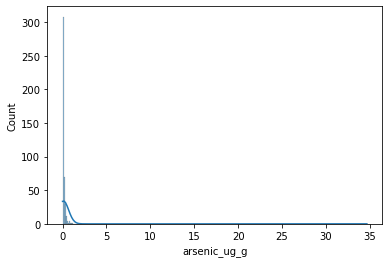

In [12]:
sb.histplot(data=flocc, x = "arsenic_ug_g", bins= 45, binrange = (0,5), kde=True)

<AxesSubplot:xlabel='cadmium_ug_g', ylabel='Count'>

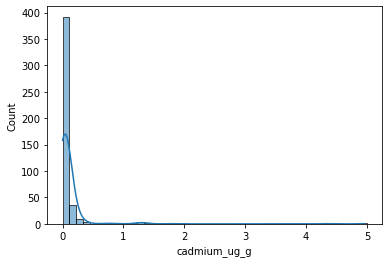

In [13]:
sb.histplot(data=flocc, x = "cadmium_ug_g", bins= 45, binrange = (0,5), kde=True)

In [14]:
flocc.describe()

,arsenic_ug_g,cadmium_ug_g,lead_ug_g,mercury_ug_g
count,453.000000,453.000000,453.000000,453.000000
mean,0.262299,0.099686,0.219294,0.015469
std,1.891079,0.354002,0.419954,0.095826
min,-0.005500,0.000067,0.000055,0.000033
25%,0.028058,0.018267,0.021933,0.003567
50%,0.063300,0.035300,0.075367,0.007167
75%,0.144000,0.070367,0.234333,0.013387
max,34.666667,4.956667,4.346667,2.000000


In [15]:
from fitter import Fitter
# DIST_CONTINU = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]
# print(len(DIST_CONTINU))

In [ ]:
# f = Fitter(flocc.lead_ug_g.to_numpy(), distributions=DIST_CONTINU)
# f.fit()
# f.summary()

In [ ]:
# f.summary()

In [ ]:
# f_hg = Fitter(np.sort(flocc.mercury_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_hg.fit()
# f_hg.summary()

In [ ]:
# f_pb = Fitter(np.sort(flocc.lead_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_pb.fit()
# f_pb.summary()

In [ ]:
# f_as = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_as.fit()
# f_as.summary()

In [ ]:
# f_cd = Fitter(flocc.cadmium_ug_g.to_numpy()[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_cd.fit()
# f_cd.summary()

In [ ]:
# f_cd = Fitter(np.sort(flocc.cadmium_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_cd.fit()
# f_cd.summary()

In [ ]:
f_as = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
f_as.fit()
f_hg = Fitter(np.sort(flocc.mercury_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
f_hg.fit()
f_cd = Fitter(np.sort(flocc.cadmium_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
f_cd.fit()
f_pb = Fitter(np.sort(flocc.lead_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
f_pb.fit()

In [ ]:
f_as.summary()


In [ ]:
f_cd.summary()


In [ ]:
f_pb.summary()

In [ ]:
f_hg.summary()


In [ ]:
f_pb.fitted_param['powerlognorm']

In [ ]:
f_hg.fitted_param['powerlognorm']

In [ ]:
f_cd.fitted_param['powerlognorm']

In [ ]:
f_as.fitted_param['powerlognorm']

In [ ]:
dist = stats.powerlognorm
as_p = f_as.fitted_param['powerlognorm']
X = np.arange(0,10, 1)
pdf_fitted = dist.pdf(X, *as_p)
sb.scatterplot(x=X, y=pdf_fitted)

In [ ]:
f_as.fitted_pdf['powerlognorm']

In [16]:
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
f_as_c = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5], distributions=get_common_distributions())
f_as_c.fit()

In [ ]:
f_as_c.summary()

In [ ]:
f_as_all = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5])
f_as_all.fit()

In [ ]:
f_as_all.summary()

In [18]:
doi = ["loglaplace", "mielke", "kappa3", "burr", "burr12", "lognorm", "gamma", "expon", "cauchy", "exponpow"]

In [20]:
fa = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5], distributions=doi)
fa.fit()
fc = Fitter(np.sort(flocc.cadmium_ug_g.to_numpy())[5:-5], distributions=doi)
fc.fit()
fl = Fitter(np.sort(flocc.lead_ug_g.to_numpy())[5:-5], distributions=doi)
fl.fit()
fm = Fitter(np.sort(flocc.mercury_ug_g.to_numpy())[5:-5], distributions=doi)
fm.fit()

,sumsquare_error,aic,bic,kl_div
loglaplace,15.484608,320.012401,-1467.418707,inf
kappa3,23.141478,326.069538,-1289.430119,inf
mielke,24.734592,334.863536,-1253.843314,inf
burr,24.764602,328.057112,-1253.306146,inf
lognorm,29.052498,310.003348,-1188.657417,inf


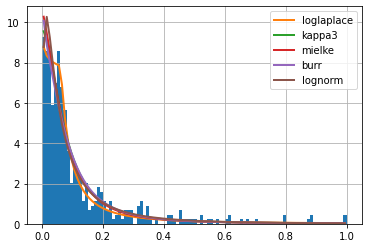

In [22]:
fa.summary()


,sumsquare_error,aic,bic,kl_div
mielke,11.326054,648.489604,-1599.869273,inf
burr,11.903861,630.156086,-1577.826895,inf
lognorm,20.884989,724.814675,-1334.880121,inf
kappa3,32.220129,650.080172,-1142.812715,inf
loglaplace,37.045303,579.811202,-1080.991988,inf


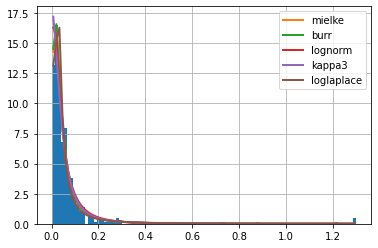

In [23]:
fc.summary()


,sumsquare_error,aic,bic,kl_div
lognorm,10.144374,451.797345,-1654.775485,inf
burr12,10.999962,476.709078,-1612.811066,inf
burr,14.183401,458.758439,-1500.209079,inf
kappa3,27.204557,494.677485,-1217.771374,inf
gamma,28.596816,460.589937,-1195.660840,inf


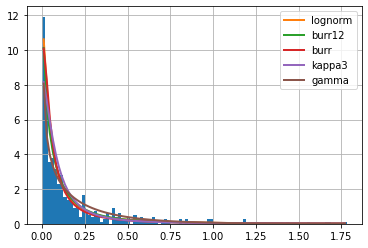

In [24]:
fl.summary()


,sumsquare_error,aic,bic,kl_div
lognorm,7444.365374,-193.977078,1268.268527,inf
expon,10182.769808,-200.515753,1400.940116,inf
exponpow,12348.822371,-43.615468,1492.472282,inf
cauchy,16606.571596,-188.809566,1617.612054,inf
gamma,51069.459932,-272.216045,2121.366583,inf


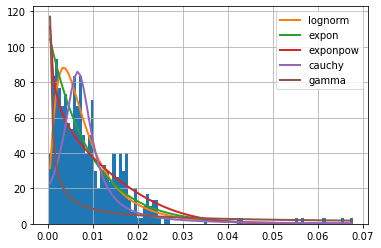

In [25]:
fm.summary()

In [27]:
pa = fa.fitted_param["lognorm"]
pc = fc.fitted_param["lognorm"]
pl = fl.fitted_param["lognorm"]
pm = fm.fitted_param["lognorm"]

In [30]:
pa

(1.1784074473961181, -0.0025065224857061166, 0.0657024705986004)

In [31]:
pl

(1.4525204178329565, 0.0001955834220820136, 0.07417152849481998)

In [42]:
test_dist = stats.lognorm.rvs(*pl, size = 1000, random_state=42)

<AxesSubplot:ylabel='Count'>

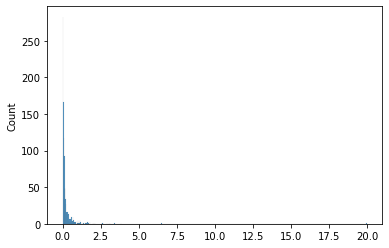

In [43]:
sb.histplot(test_dist)

<AxesSubplot:ylabel='Count'>

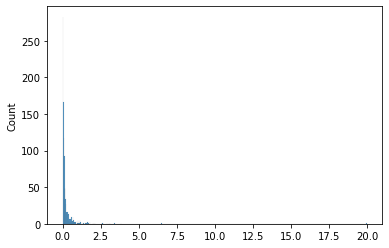

In [44]:
test2_dist = stats.lognorm.rvs(1.4525204178329565, 0.0001955834220820136, 0.07417152849481998, size = 1000, random_state=42)
sb.histplot(test2_dist)

<AxesSubplot:xlabel='lead_ug_g', ylabel='Count'>

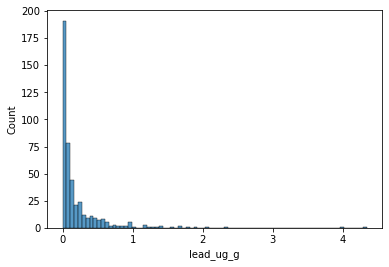

In [50]:
sb.histplot(data=flocc, x = "lead_ug_g")

<AxesSubplot:xlabel='lead_ug_g', ylabel='Density'>

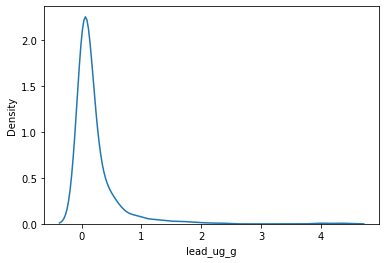

In [55]:
# sb.kdeplot(x=test2_dist)
sb.kdeplot(x=flocc.loc[:,"lead_ug_g"])

In [45]:
test_dist_s = np.sort(test_dist)
for i in test_dist_s[990:]:
    print(i)

2.5888281556425268
2.624979748079379
2.6554342582156703
2.9127952180246783
3.056480649567351
3.115985613194405
3.3948901159127445
3.856565631534016
6.493440045419938
19.98148365422706


In [49]:
fail = test_dist_s >= 1.24
1 - (np.sum(fail) / 1000)

0.975